In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import random

In [2]:
X, y = make_blobs(n_samples=200, centers=2) # prdefined sklearn method to generate rough data for practice here center may be 2 classes

In [3]:
X # X has 2 features lets say x0 and x1

array([[ -6.85482621,  -8.88357255],
       [ -3.31044119,  -5.69502416],
       [ -5.58195882,  -8.90679469],
       [ -3.57179941, -10.42960255],
       [ -1.80754736,  -6.3143385 ],
       [ -6.84450484,  -9.46592372],
       [ -2.23686372,  -4.87225294],
       [ -1.74980362,  -6.16082608],
       [ -6.37747305,  -9.54972308],
       [ -6.02810686,  -9.01946826],
       [ -5.70190976, -10.13806353],
       [ -5.98366128, -11.07843767],
       [ -4.45994405,  -7.55643485],
       [ -2.20767483,  -5.59555014],
       [ -2.24512884,  -4.37463833],
       [ -5.8146879 , -10.5813691 ],
       [ -4.51900662,  -4.80306404],
       [ -6.24073516,  -9.61331213],
       [ -1.9363748 ,  -4.97243778],
       [ -7.67905756,  -9.72613188],
       [ -2.45702073,  -4.63488432],
       [ -6.88789639,  -9.56121074],
       [ -5.501265  ,  -9.46689524],
       [ -1.88993375,  -7.14266011],
       [ -5.8807856 , -10.08042549],
       [ -4.60866703,  -8.03592184],
       [ -7.40870471,  -9.04187389],
 

In [4]:
y

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0])

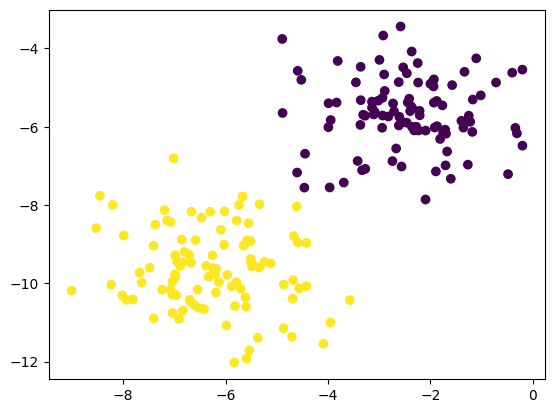

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
lr = 0.01
epochs= 100
w=0
b=0
y = np.where(y==0,1,-1) # we have changed y in +1 and -1 to match with our constraints
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.20,random_state=42)


After we devloped the equations to minimize ||W|| ^2 , we add lagrange's parameters and constraints, we get the following equation.






In [7]:
def svm_fit(X,y):
    n_sample, n_features = X.shape
    b=0
    lr = 0.01
    lagranges_ = 0.01
    w= np.zeros(n_features)# vector must be of the same shape of the input vectors
    
    #initial weights(w) and bias(b) is 0, and at every epoch we learn and update the w and b. Our goal is to get w and b such that
    #  for any new input vector v   w.v>=c if v is positive sample and w.v<=c if v is negative sample ( we have discuss this in classroom when I started mathematical intution of SVM)
    # It will try to find best hyperplane by running number of epochs
    for iteration in range(100):
        for i, Xi in enumerate(X):
            # yixiw-b≥1 (This is the constraint we have used to get the distance between support vectors x+ and x-(refer class notes.))
            if y[i] * (np.dot(Xi,w) - b) >= 1 :#This condition is for all correct classification (positive or negative)
                w =w - lr * (2 * lagranges_* w) # w = w + lr* (2λw - yixi)
            else: 
                w =w - lr * (2 *lagranges_ * w - np.dot(Xi, y[i])) # w = w + lr* (2λw - yixi)
                b = b - lr * y[i] # b = b - lr* (yi)
       # plt.scatter(w[0],w[1])
        return w, b




In [8]:
def predict(X, w,b):
    pred = np.dot(X, w) - b 
    result = [1 if val > 0 else -1 for val in pred] # returning in the form of -1 and 1
    return result

In [9]:
X.shape # where 200 is number of samples and 2 is number of features
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.20,random_state=42)
w,b = svm_fit(X_train,y_train)
y_pred = predict(X_test,w,b)

In [10]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.725

In [11]:
#plt.scatter(X[:,0],X[:,1],c=y)


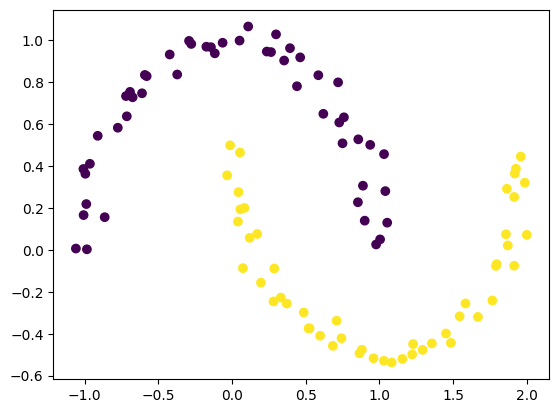

In [12]:
from sklearn.datasets import make_moons
X1, y1 = make_moons(n_samples=100, noise=.05)
plt.scatter(X1[:,0],X1[:,1],c=y1)


In [13]:
# Lets apply same linear classifier on non linear data. the accuracy is less due to non linearity
X1_train,X1_test, y1_train, y1_test= train_test_split(X1,y1,test_size=0.20,random_state=42)
w1,b1 = svm_fit(X1_train,y1_train)
y1_pred = predict(X1_test,w1,b1)
accuracy1 = accuracy_score(y1_pred, y1_test)
accuracy1

0.5

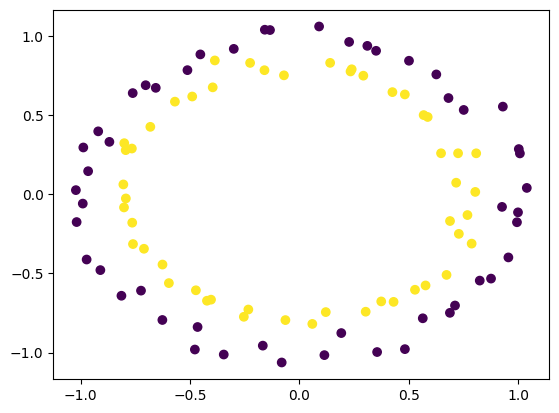

In [14]:
from sklearn.datasets import make_circles
X2,y2= make_circles(n_samples=100, noise=0.05)
plt.scatter(X2[:,0],X2[:,1],c=y2)

In [15]:
# Lets apply same linear classifier on circular data. the accuracy is less due to non linearity
X2_train,X2_test, y2_train, y2_test= train_test_split(X2,y2,test_size=0.20,random_state=42)
w2,b2 = svm_fit(X2_train,y2_train)
y2_pred = predict(X2_test,w2,b2)
accuracy2 = accuracy_score(y2_pred, y2_test)
accuracy2

0.6

# The given code will generate linear classifir for all given examples. 

# Excercise 1 
 # Plot the classifire line for all linear and non-linear data

# Excercise 2
 # Use the SVM classifier from SK Learn. 

# Excercise 3 
 # Use the SVM classifier from SK Learn with different kernal function which is capable to classify non-linear data.